The primary aim is to use volatile organic compounds (VOCs) in exhaled breath to determine if a person has hepatic encephalopathy (HE) and to determine if a person has a cirrhotic liver. The VOC data can be `recoded into a binary format for absent/present`, and `various transformations (e.g. square root, cube root)` can also be applied to the numeric data to improve the model.

To avoid potential confounders, the data can be adjusted to exclude VOCs associated with smoking or recent food intake. There are many different modeling techniques `(e.g. RF, SVM, logistic models)` that can be applied to the data, and various diagnostic metrics `(e.g. AUROC, sensitivity and specificity)` can be used to evaluate the performance of the models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/P2U.csv')
df

,Row,age,category,cirrhosis,HE,HE_grade,Tobacco_use_last_48hrs,Last_food_intake_hrs,propene,ammonia,...,A_1_1_oxybis_octane,unknown_36.40,unknown_36.41,unknown_36.52,unknown_36.72,unknown_36.75,unknown_36.79,unknown_36.80,A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one,unknown_36.91
0,1,42,lung,no,no,0,no,3.5,0,0,...,0,0,0,15040000,27970000,0,0,0,0,25040000
1,2,71,alcoholic cirrhosis,yes,no,0,no,1.0,0,0,...,0,0,0,1848864,0,26780000,0,0,0,0
2,3,43,alcoholic cirrhosis,yes,no,0,yes,1.0,0,190579,...,0,0,0,0,0,9366000,0,0,0,0
3,4,70,lung,no,no,0,no,3.0,0,0,...,0,0,0,18150000,33960000,0,0,0,0,0
4,5,62,lung,no,no,0,no,3.0,0,0,...,0,0,0,12890000,25900000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,116,56,Healthy,no,no,0,no,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,117,59,Healthy,no,no,0,no,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,118,31,Healthy,no,no,0,no,1.5,0,0,...,0,0,0,3387474,832210,573055,0,0,0,0
95,119,44,Healthy,no,no,0,yes,1.0,0,0,...,0,0,0,2404239,0,658129,0,0,0,0


In [6]:
# check information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 390 entries, Row to unknown_36.91
dtypes: float64(1), int64(384), object(5)
memory usage: 295.7+ KB


In [7]:
# what are the known columns
df.columns

Index(['Row', 'age', 'category', 'cirrhosis', 'HE', 'HE_grade',
       'Tobacco_use_last_48hrs', 'Last_food_intake_hrs', 'propene', 'ammonia',
       ...
       'A_1_1_oxybis_octane', 'unknown_36.40', 'unknown_36.41',
       'unknown_36.52', 'unknown_36.72', 'unknown_36.75', 'unknown_36.79',
       'unknown_36.80', 'A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one',
       'unknown_36.91'],
      dtype='object', length=390)

In [8]:
# get unique values
# Use the apply method to check for unique values in all columns
unique_values = df.apply(lambda x: x.unique())

print(unique_values)

Row                                                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
age                                                [42, 71, 43, 70, 62, 35, 48, 45, 73, 57, 67, 1...
category                                           [lung, alcoholic cirrhosis, ARHP, no cirrhosis...
cirrhosis                                                                                  [no, yes]
HE                                                                                         [no, yes]
                                                                         ...                        
unknown_36.75                                      [0, 26780000, 9366000, 2266474, 84410000, 1017...
unknown_36.79                                                                           [0, 2423000]
unknown_36.80                                                                           [0, 1302178]
A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one                               [0, 7068000, 

In [9]:
df['category'].unique()

array(['lung', 'alcoholic cirrhosis', 'ARHP, no cirrhosis',
       'non-alcoholic cirrhosis', 'alc + non-alc cirrhosis', 'Healthy'],
      dtype=object)

In [10]:
# mapping = {"alcoholic cirrhosis": 1, "non-alcoholic cirrhosis": 1, "Healthy": 0}
# df["Binary_column"] = df["category"].map(mapping)

In [11]:
# df['Binary_column'].unique()

based on this category "'lung', 'alcoholic cirrhosis', 'ARHP, no cirrhosis',
       'non-alcoholic cirrhosis', 'alc + non-alc cirrhosis', 'Healthy'" how to make it a binary

what of "lung, ARHP, ARHP, no cirrhosis, alc + non-alc cirrhosis

Choosing "alcoholic cirrhosis" and "non-alcoholic cirrhosis" as the positive classes and "healthy" as the negative class to represent the presence or absence of cirrhosis is just one way of binarizing the data. This method is best in this case because it's trying to solve the problem of determining if a person has cirrhosis of the liver, and "alcoholic cirrhosis" and "non-alcoholic cirrhosis" are the two most relevant categories for this problem.

However, this binarization is not always the best option, as it can have assumptions that may not be true and some loss of information that can be critical. In this specific case, the assumption is made that non-alcoholic and alcoholic cirrhosis are similar, but that may not be always true. Furthermore, this binarization does not take into account other categories that may be relevant to the problem.

In [15]:
# check missing values
# Use the isnull() function to find all missing values
missing_values = df.isnull()

# Use the sum() function to count the number of missing values in each column
missing_value_count = missing_values.sum()

print(missing_value_count)

Row                                                0
age                                                0
category                                           0
cirrhosis                                          0
HE                                                 0
                                                  ..
unknown_36.75                                      0
unknown_36.79                                      0
unknown_36.80                                      0
A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one    0
unknown_36.91                                      0
Length: 390, dtype: int64


In [16]:
# Use the isnull() function to find all missing values
missing_values = df.isnull()

# Use the sum() function to count the number of missing values in each column
missing_value_count = missing_values.sum()

print(missing_value_count)

Row                                                0
age                                                0
category                                           0
cirrhosis                                          0
HE                                                 0
                                                  ..
unknown_36.75                                      0
unknown_36.79                                      0
unknown_36.80                                      0
A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one    0
unknown_36.91                                      0
Length: 390, dtype: int64


In [18]:
missing_value_count = df.isna().any().any()
missing_value_count

False

# EDA

Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 390 entries, Row to unknown_36.91
dtypes: float64(1), int64(384), object(5)
memory usage: 295.7+ KB


In [13]:
df.describe()

,Row,age,Last_food_intake_hrs,propene,ammonia,unknown_4.21,isobutane,butane,acetaldehyde,methanol,...,A_1_1_oxybis_octane,unknown_36.40,unknown_36.41,unknown_36.52,unknown_36.72,unknown_36.75,unknown_36.79,unknown_36.80,A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one,unknown_36.91
count,97.000000,97.000000,97.000000,9.700000e+01,9.700000e+01,97.0,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,...,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01
mean,60.432990,51.649485,3.634021,3.267010e+04,7.617635e+06,0.0,3.117526e+04,3.136946e+07,4.489558e+07,1.764527e+07,...,7.519588e+04,2.979381e+05,5.744330e+04,2.432868e+06,2.533035e+06,1.868864e+06,2.497938e+04,1.342452e+04,7.528660e+05,1.056118e+06
std,35.888109,15.042330,3.262409,3.217632e+05,7.126778e+07,0.0,3.070407e+05,1.316905e+08,4.740860e+07,2.540464e+07,...,5.211816e+05,2.465313e+06,4.295385e+05,5.328507e+06,6.892283e+06,9.093808e+06,2.460184e+05,1.322161e+05,6.728127e+06,2.979371e+06
min,1.000000,19.000000,0.500000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,31.000000,42.000000,2.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,59.000000,50.000000,3.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3.666648e+07,1.399746e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,7.613740e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,91.000000,61.000000,3.500000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.267500e+04,7.027789e+07,2.751913e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,2.503000e+06,1.548000e+06,7.581240e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.100737e+06
max,120.000000,93.000000,20.000000,3.169000e+06,7.013000e+08,0.0,3.024000e+06,8.688000e+08,2.082167e+08,1.946451e+08,...,3.756000e+06,2.379000e+07,3.906000e+06,2.875000e+07,3.516000e+07,8.441000e+07,2.423000e+06,1.302178e+06,6.596000e+07,2.504000e+07


Since you have a large number of columns, it can be challenging to visually inspect each column for outliers. One way to quickly identify columns with outliers is by using summary statistics such as the mean, standard deviation, and interquartile range (IQR). For example, you can calculate the z-score for each observation in each column, which is a measure of how many standard deviations an observation is from the mean. Any observations with a z-score greater than a certain threshold (e.g. 3) can be considered outliers.

In [14]:
data = df.copy()

In [118]:
data.dropna(axis=1, inplace=True)
data.dropna(inplace=True)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 390 entries, Row to unknown_36.91
dtypes: float64(1), int64(384), object(5)
memory usage: 295.7+ KB


find all the columns with a specific data type 

In [32]:
numeric_columns = list(data.select_dtypes(include=['int']).columns)+ \
                    list(data.select_dtypes(include=['float']).columns)
categorical_columns = list(data.select_dtypes(include=['object']).columns)



Counts of Category
alcoholic cirrhosis        34
non-alcoholic cirrhosis    21
lung                       18
Healthy                    15
ARHP, no cirrhosis          8
alc + non-alc cirrhosis     1
Name: category, dtype: int64
--------------------------------------------------

Crosstab of Category vs cirrhosis
cirrhosis                no  yes
category                        
ARHP, no cirrhosis        8    0
Healthy                  15    0
alc + non-alc cirrhosis   0    1
alcoholic cirrhosis       0   34
lung                     18    0
non-alcoholic cirrhosis   0   21
--------------------------------------------------

Crosstab of Category vs HE
HE                       no  yes
category                        
ARHP, no cirrhosis        8    0
Healthy                  15    0
alc + non-alc cirrhosis   1    0
alcoholic cirrhosis      23   11
lung                     18    0
non-alcoholic cirrhosis  20    1
--------------------------------------------------


Text(0.5, 1.0, 'frequency distributions of the categories')

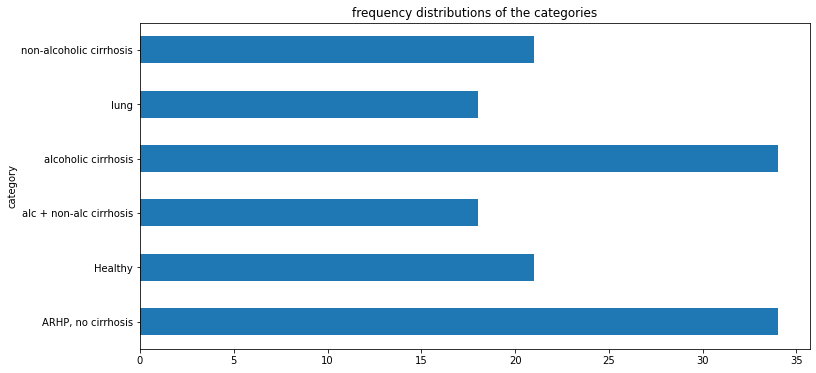

In [99]:
# Frequency distributions
counts = df["category"].value_counts()
print('Counts of Category')
print(counts)
print('-'*50)

print()

# bar chart of the frequency distributions
counts.plot(kind="barh")

# Crosstabs
ct_ci = pd.crosstab(df["category"], df["cirrhosis"])
print('Crosstab of Category vs cirrhosis')
print(ct_ci)
print('-'*50)
print()

ct_he = pd.crosstab(df["category"], df["HE"])
print('Crosstab of Category vs HE')
print(ct_he)
print('-'*50)


# Barplot
df.groupby(['category']).size().plot(kind='barh', figsize=(12,6))
plt.title('frequency distributions of the categories')

The first table shows the frequency count of the different categories in a column labeled "category" in a Dataframe. It shows the number of observations for each category: "alcoholic cirrhosis" has 34 observations, "non-alcoholic cirrhosis" has 21 observations, "lung" has 18 observations, "Healthy" has 15 observations, "ARHP, no cirrhosis" has 8 observations, and "alc + non-alc cirrhosis" has only 1 observation.

The second table is a cross-tabulation or contingency table between the "category" column and a "cirrhosis" column, indicating whether or not an observation has cirrhosis. The table shows the count of observations that belong to a specific category and have cirrhosis or not. The "no" column represents the number of observations that do not have cirrhosis, and the "yes" column represents the number of observations that have cirrhosis.

It is shown that all observations that belong to "ARHP, no cirrhosis" category do not have cirrhosis, while all the observations in the "alcoholic cirrhosis" category have cirrhosis.

The last table is a cross-tabulation or contingency table between the "category" column and a "HE" column, indicating whether or not an observation has HE. This table shows the count of observations that belong to a specific category and have HE or not. The "no" column represents the number of observations that do not have HE, and the "yes" column represents the number of observations that have HE.

The table shows that all observations in the "ARHP, no cirrhosis" and "Healthy" categories do not have HE. While the "alcoholic cirrhosis" and "non-alcoholic cirrhosis" categories present more cases of HE.

These tables provide a summary of the distribution of cirrhosis and HE status across different categories, and can be used as a starting point to understand the data, identify patterns and outliers, and generate hypotheses for further analysis.

age vs category

category
ARHP, no cirrhosis         41.500000
Healthy                    39.600000
alc + non-alc cirrhosis    50.000000
alcoholic cirrhosis        50.323529
lung                       67.277778
non-alcoholic cirrhosis    52.952381
Name: age, dtype: float64


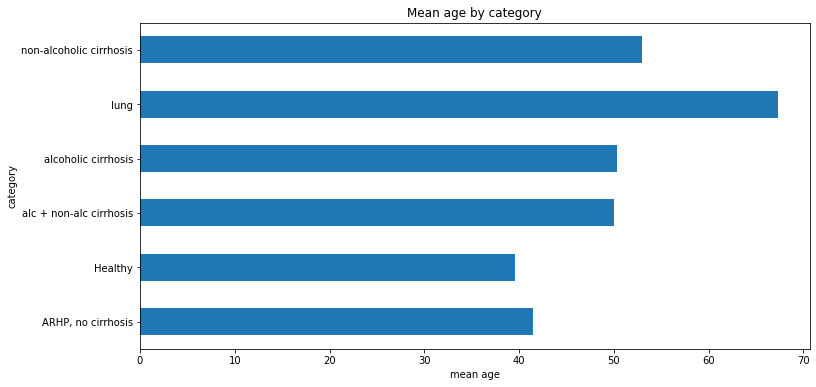

In [82]:
# group the df by category
grouped = df.groupby("category")
print(grouped["age"].mean())

plt.figure(figsize=(12, 6))
# plot the mean age for each category
grouped["age"].mean().plot(kind='barh')

# customize the plot
plt.xlabel("mean age")
plt.ylabel("category")
plt.title("Mean age by category")

# show the plot
plt.show()


The bar plot, it shows that individuals in the "ARHP, no cirrhosis" category have the lowest mean age at 41.5 years, while individuals in the "lung" category have the highest mean age at 67.28 years. Secondly, it also shows that alcoholic cirrhosis and alc + non-alc cirrhosis have similar mean age, 50.323529 and 50 respectively.



Choosing "alcoholic cirrhosis" and "non-alcoholic cirrhosis" as the positive classes and "healthy" as the negative class to represent the presence or absence of cirrhosis is just one way of binarizing the data. This method is best in this case because it's trying to solve the problem of determining if a person has cirrhosis of the liver, and "alcoholic cirrhosis" and "non-alcoholic cirrhosis" are the two most relevant categories for this problem.

However, this binarization is not always the best option, as it can have assumptions that may not be true and some loss of information that can be critical. In this specific case, the assumption is made that non-alcoholic and alcoholic cirrhosis are similar, but that may not be always true. Furthermore, this binarization does not take into account other categories that may be relevant to the problem.

We can convert the data into a binary format by creating new binary columns based on the values of the existing "cirrhosis" and "HE" columns. For example, we can create two new columns, "cirrhosis_binary" and "HE_binary", that will have the value of 1 for observations that have cirrhosis or HE and 0 for observations that do not.

Then, we can combine the "cirrhosis_binary" and "HE_binary" columns into a single column, creating a label or target column. This label column can be used to indicate whether the observation has either condition, or both of them based on the logical operator that we chose. This will give us a simpler representation of the data and make it more convenient to use for modeling and analysis.

In [83]:
df

,Row,age,category,cirrhosis,HE,HE_grade,Tobacco_use_last_48hrs,Last_food_intake_hrs,propene,ammonia,...,A_1_1_oxybis_octane,unknown_36.40,unknown_36.41,unknown_36.52,unknown_36.72,unknown_36.75,unknown_36.79,unknown_36.80,A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one,unknown_36.91
0,1,42,lung,no,no,0,no,3.5,0,0,...,0,0,0,15040000,27970000,0,0,0,0,25040000
1,2,71,alcoholic cirrhosis,yes,no,0,no,1.0,0,0,...,0,0,0,1848864,0,26780000,0,0,0,0
2,3,43,alcoholic cirrhosis,yes,no,0,yes,1.0,0,190579,...,0,0,0,0,0,9366000,0,0,0,0
3,4,70,lung,no,no,0,no,3.0,0,0,...,0,0,0,18150000,33960000,0,0,0,0,0
4,5,62,lung,no,no,0,no,3.0,0,0,...,0,0,0,12890000,25900000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,116,56,Healthy,no,no,0,no,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,117,59,Healthy,no,no,0,no,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,118,31,Healthy,no,no,0,no,1.5,0,0,...,0,0,0,3387474,832210,573055,0,0,0,0
95,119,44,Healthy,no,no,0,yes,1.0,0,0,...,0,0,0,2404239,0,658129,0,0,0,0


In [100]:
# Create a copy of the dataframe
data_binary = df.copy()

# Create a new column for binary cirrhosis
data_binary['cirrhosis_binary'] = (data_binary['cirrhosis'] == 'yes').astype(int)

# Create a new column for binary HE
data_binary['HE_binary'] = (data_binary['HE'] == 'yes').astype(int)

In [101]:
data_binary['binary_label'] = data_binary['cirrhosis_binary'] | data_binary['HE_binary']
data_binary['binary_label']

0     0
1     1
2     1
3     0
4     0
     ..
92    0
93    0
94    0
95    0
96    0
Name: binary_label, Length: 97, dtype: int64

so 1 means the patience has epatic encephalopathy (HE) and 0 mean the patience is healthy.

In [86]:
categorical_columns

['category', 'cirrhosis', 'HE', 'HE_grade', 'Tobacco_use_last_48hrs']

In [87]:
data_binary

,Row,age,category,cirrhosis,HE,HE_grade,Tobacco_use_last_48hrs,Last_food_intake_hrs,propene,ammonia,...,unknown_36.52,unknown_36.72,unknown_36.75,unknown_36.79,unknown_36.80,A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one,unknown_36.91,cirrhosis_binary,HE_binary,binary_label
0,1,42,lung,no,no,0,no,3.5,0,0,...,15040000,27970000,0,0,0,0,25040000,0,0,0
1,2,71,alcoholic cirrhosis,yes,no,0,no,1.0,0,0,...,1848864,0,26780000,0,0,0,0,1,0,1
2,3,43,alcoholic cirrhosis,yes,no,0,yes,1.0,0,190579,...,0,0,9366000,0,0,0,0,1,0,1
3,4,70,lung,no,no,0,no,3.0,0,0,...,18150000,33960000,0,0,0,0,0,0,0,0
4,5,62,lung,no,no,0,no,3.0,0,0,...,12890000,25900000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,116,56,Healthy,no,no,0,no,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,117,59,Healthy,no,no,0,no,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,118,31,Healthy,no,no,0,no,1.5,0,0,...,3387474,832210,573055,0,0,0,0,0,0,0
95,119,44,Healthy,no,no,0,yes,1.0,0,0,...,2404239,0,658129,0,0,0,0,0,0,0


###### More visualization

compare the distribution of "cirrhosis", "HE", "HE_grade" and "Tobacco_use_last_48hrs" across different categories:

In [104]:
data_binary['category'].value_counts()

alcoholic cirrhosis        34
non-alcoholic cirrhosis    21
lung                       18
Healthy                    15
ARHP, no cirrhosis          8
alc + non-alc cirrhosis     1
Name: category, dtype: int64

In [106]:
# data_counts =
data_binary.groupby(['category', 'cirrhosis']).size().reset_index(name='counts')

,category,cirrhosis,counts
0,"ARHP, no cirrhosis",no,8
1,Healthy,no,15
2,alc + non-alc cirrhosis,yes,1
3,alcoholic cirrhosis,yes,34
4,lung,no,18
5,non-alcoholic cirrhosis,yes,21


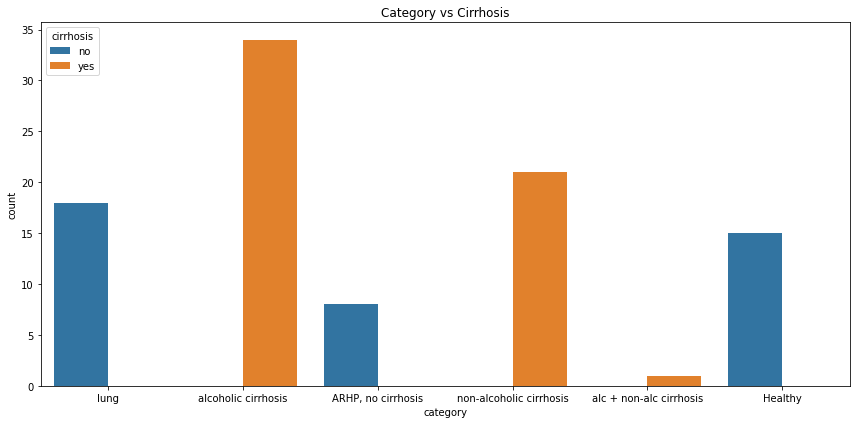

In [88]:
#Create a countplot for each variable with the category as the hue
plt.figure(figsize=(12,6))
sns.countplot(data=data_binary, x='category', hue='cirrhosis')
plt.title('Category vs Cirrhosis')
plt.tight_layout()
plt.show()

This is a countplot of observations the dataset that have been grouped by their "category" value. The categories are "alcoholic cirrhosis", "non-alcoholic cirrhosis", "lung", "Healthy", "ARHP, no cirrhosis" and "alc + non-alc cirrhosis".

From the plot, it can be inferred that the majority of observations fall under "alcoholic cirrhosis" category (34 observations) while the least amount of observations fall under "alc + non-alc cirrhosis" category (1 observation). "Lung" and "non-alcoholic cirrhosis" also have a considerable number of observations (18 and 21 respectively). "Healthy" and "ARHP, no cirrhosis" have fewer observations (15 and 8 respectively).

In [109]:
data_binary[['category','HE']].value_counts()

category                 HE 
alcoholic cirrhosis      no     23
non-alcoholic cirrhosis  no     20
lung                     no     18
Healthy                  no     15
alcoholic cirrhosis      yes    11
ARHP, no cirrhosis       no      8
alc + non-alc cirrhosis  no      1
non-alcoholic cirrhosis  yes     1
dtype: int64

In [108]:
print(data_binary.groupby(['category', 'HE']).size().reset_index(name='counts'))

                  category   HE  counts
0       ARHP, no cirrhosis   no       8
1                  Healthy   no      15
2  alc + non-alc cirrhosis   no       1
3      alcoholic cirrhosis   no      23
4      alcoholic cirrhosis  yes      11
5                     lung   no      18
6  non-alcoholic cirrhosis   no      20
7  non-alcoholic cirrhosis  yes       1


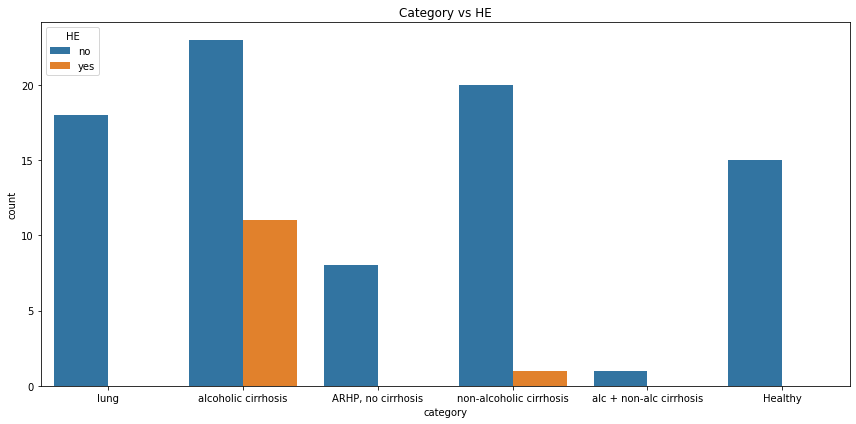

In [89]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_binary, x='category', hue='HE')
plt.title('Category vs HE')
plt.tight_layout()
plt.show()


This plot is showing the count of observations in a dataset grouped by the values in the 'category' and 'HE' on the axes. Each column corresponds to a unique combination of 'category' and 'HE' values, and the 'counts' column shows the number of observations with those values.

It can be seen that the majority of observations fall under the "alcoholic cirrhosis" category with a total of 23 observations for the HE = no and 11 observations for the HE = yes. This suggests that majority of the observations in this dataset belong to the "alcoholic cirrhosis" category.

The second highest number of observations fall under the "non-alcoholic cirrhosis" category with a total of 20 observations for the HE = no and 1 observation for the HE = yes.

"Lung" and "Healthy" also have a considerable number of observations, 18 and 15 respectively.

It is also important to notice that the dataset is unbalanced, which might affect the results of some models therefore we need to make data transformation. The representation of the observations in each category and HE is not equal.

This plot is showing the count of observations in a dataset grouped by the values in the 'category' and 'HE' on the axes. Each column corresponds to a unique combination of 'category' and 'HE' values, and the 'counts' column shows the number of observations with those values.

In this case, it is showing that there are 34 observations with the value "alcoholic cirrhosis" in the 'category' column and "no" in the 'HE' column. Similarly, there are 21 observations with the value "non-alcoholic cirrhosis" in the 'category' column and "yes" in the 'HE' column.

It also shows that there are 18 observations with the value "lung" in the 'category' column and "no" in the 'HE' column.

Similarly, there are 15 observations with the value "Healthy" in the 'category' column and "no" in the 'HE' column.
There are 8 observations with the value "ARHP, no cirrhosis" in the 'category' column and "no" in the 'HE' column and 1 observations with the value "alc + non-alc cirrhosis" in the 'category' column and "no" in the 'HE' column.

compare the distribution of "HE_grade" across different categories and see if there is any relation with cirrhosis or HE

In [110]:
data_binary[['category','HE_grade']].value_counts()

category                 HE_grade    
alcoholic cirrhosis      0               23
non-alcoholic cirrhosis  0               20
lung                     0               18
Healthy                  0               15
ARHP, no cirrhosis       0                8
alcoholic cirrhosis      mild             6
                         intermediate     4
alc + non-alc cirrhosis  0                1
alcoholic cirrhosis      severe           1
non-alcoholic cirrhosis  mild             1
dtype: int64

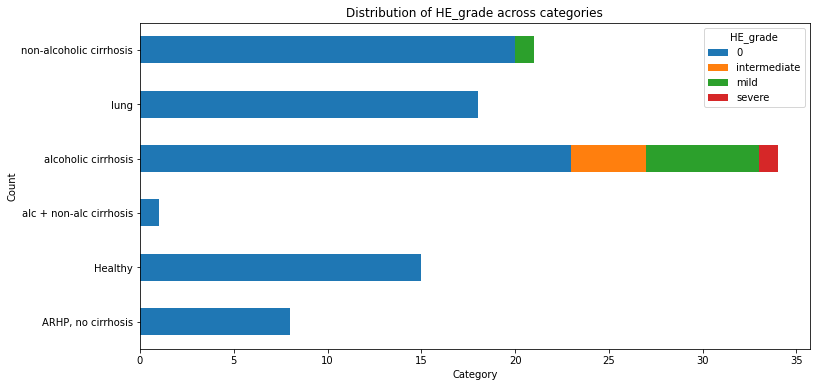

In [95]:
# Comparing distribution of 'HE_grade' across different categories
data_binary.groupby(['category', 'HE_grade']).size().unstack().plot(kind='barh', stacked=True, figsize=(12,6))
plt.title("Distribution of HE_grade across categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


or

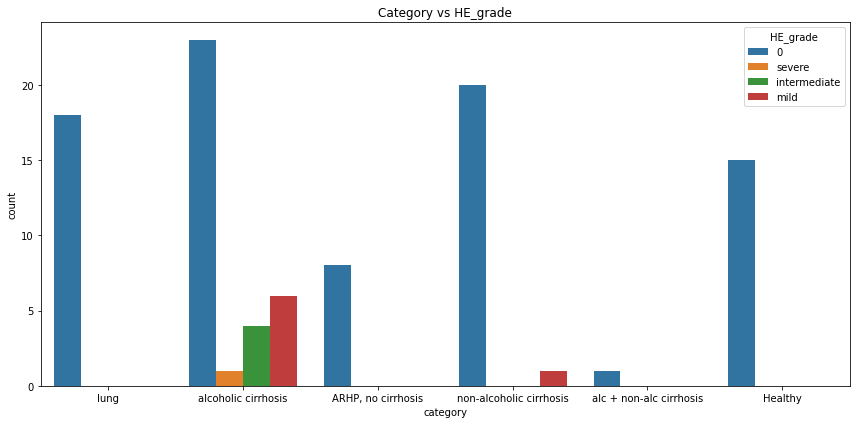

In [90]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_binary, x='category', hue='HE_grade')
plt.title('Category vs HE_grade')
plt.tight_layout()
plt.show()

In this plot, it can be seen that for the category of "alcoholic cirrhosis", HE_grade is 0 for 23 of the cases and mild for 6 of the cases and intermediate for 4 of the cases and severe for 1 of the cases. 

Similarly, for the category of "non-alcoholic cirrhosis", HE_grade is 0 for 20 of the cases and mild for 1 of the case. For the category of "lung", HE_grade is 0 for 18 of the cases.

For the category of "Healthy", HE_grade is 0 for 15 of the cases. For the category of "ARHP, no cirrhosis", HE_grade is 0 for 8 of the cases. And for the category of "alc + non-alc cirrhosis", HE_grade is 0 for 1 of the case.

compare the distribution of "Tobacco_use_last_48hrs" across different categories and see if there is any relation with cirrhosis or HE:

In [111]:
data_binary[['category','Tobacco_use_last_48hrs']].value_counts()

category                 Tobacco_use_last_48hrs
alcoholic cirrhosis      no                        24
lung                     no                        16
non-alcoholic cirrhosis  no                        12
Healthy                  no                        11
alcoholic cirrhosis      yes                       10
non-alcoholic cirrhosis  yes                        9
ARHP, no cirrhosis       no                         4
                         yes                        4
Healthy                  yes                        4
lung                     yes                        2
alc + non-alc cirrhosis  no                         1
dtype: int64

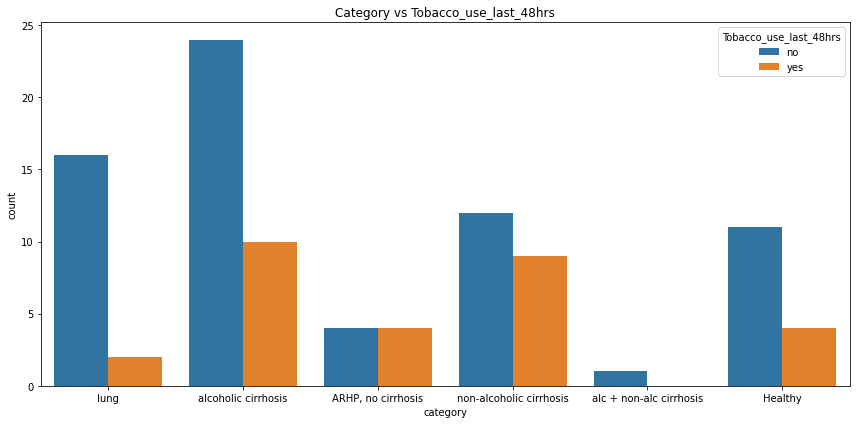

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_binary, x='category', hue='Tobacco_use_last_48hrs')
plt.title('Category vs Tobacco_use_last_48hrs')
plt.tight_layout()
plt.show()


or

compare the distribution of "Tobacco_use_last_48hrs" across different categories and see if there is any relation with cirrhosis or HE

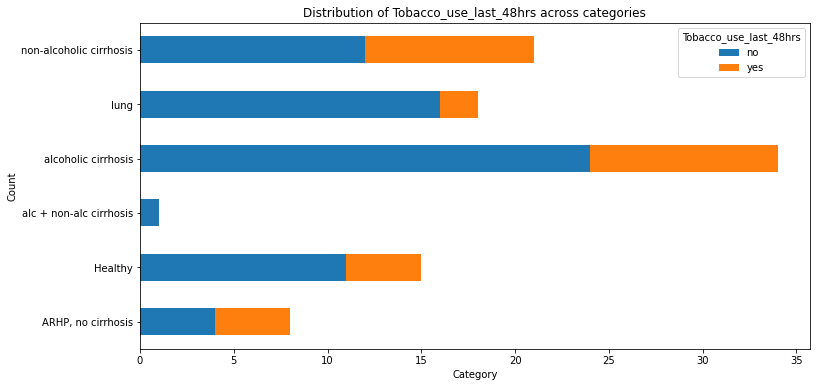

In [94]:
# Comparing distribution of 'Tobacco_use_last_48hrs' across different categories
data_binary.groupby(['category', 'Tobacco_use_last_48hrs']).size().unstack().plot(kind='barh', stacked=True, figsize=(12,6))
plt.title("Distribution of Tobacco_use_last_48hrs across categories")
plt.xlabel("Category")
plt.ylabel("Count")

plt.show()


From the plot, the tobacco use in the last 48 hours for each category is being presented in this table. The number of observations where tobacco use was reported as "no" or "yes" is shown for categories such as "alcoholic cirrhosis", "lung", "non-alcoholic cirrhosis", "Healthy", "ARHP, no cirrhosis" and "alc + non-alc cirrhosis". 

The plot also shows that the majority of observations in the "alcoholic cirrhosis" and "non-alcoholic cirrhosis" categories reported no tobacco use in the last 48 hours. While in "lung" category majority reported no use of tobacco. It also shows that a smaller proportion of observations in the "Healthy" category reported tobacco use in the last 48 hours, and smallest proportion in the "alc + non-alc cirrhosis" category.

compare the relationship between "cirrhosis" and "HE" by creating a cross tabulation and then a stacked bar plot of the cross tabulation

In [112]:
data_binary[['cirrhosis','HE']].value_counts()

cirrhosis  HE 
yes        no     44
no         no     41
yes        yes    12
dtype: int64

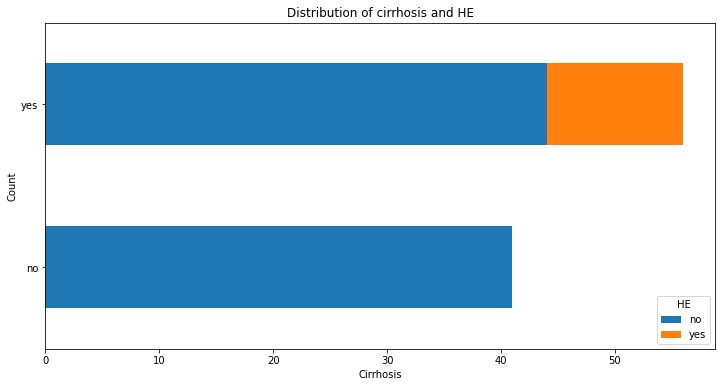

In [97]:
# Comparing relationship between 'cirrhosis' and 'HE'
crosstab = pd.crosstab(data_binary['cirrhosis'], data_binary['HE'])
crosstab.plot(kind='barh', stacked=True, figsize=(12,6))
plt.title("Distribution of cirrhosis and HE")
plt.xlabel("Cirrhosis")
plt.ylabel("Count")
plt.show()


This plot is showing the count of observations that have "yes" or "no" values for the variables "cirrhosis" and "HE". It is observed that, 44 observations have "yes" value for "cirrhosis" and "no" value for "HE", 41 observations have "no" value for "cirrhosis" and "no" value for "HE", and 12 observations have "yes" values for both "cirrhosis" and "HE".

# Data Transformation

various transformations (e.g. square root, cube root)` can also be applied to the numeric data to improve the model.

 In general, it's a good idea to perform any data cleaning and preprocessing steps before creating visualizations, as this can help ensure that the data is in a format that is suitable for the type of visualization you want to create.

In some cases, applying data transformations before visualization can help reveal patterns or trends in the data that may not be immediately apparent with the raw data.

However, it is important to note that the choice of transformation will depend on the specific characteristics of the data, and it is always a good practice to visually inspect the data before and after transformation to ensure that the transformation is appropriate.

In [114]:
numeric_columns


['Row',
 'age',
 'propene',
 'ammonia',
 'unknown_4.21',
 'isobutane',
 'butane',
 'acetaldehyde',
 'methanol',
 'unknown_5.60',
 'A_2_methylbutane',
 'unknown_6.16',
 'pentane',
 'ethanol',
 'unknown_6.50',
 'isoprene',
 'unknown_6.88',
 'unknown_7.02',
 'A_2_2_dimethylbutane',
 'acetone',
 'isopropanol',
 'unknown_7.42',
 'acetonitrile',
 'A_4_methyl_1_pentene',
 'A_2_methylpentane',
 'A_2_methyl_2_propanol',
 'unknown_8.01',
 'unknown_8.13',
 'A_3_methylpentane',
 'unknown_8.59',
 'hexane',
 'unknown_8.83',
 'unknown_8.90',
 'A_4_methyl_Z_2_pentene',
 'unknown_8.99',
 'methacrolein',
 'A_1_propanol',
 'unknown_9.23',
 'unknown_9.25',
 'A_2_methylfuran',
 'unknown_9.39',
 'A_2_2_dimethylpentane',
 'A_2_4_dimethylpentane',
 'butanal',
 'A_2_3_butanedione',
 'methyl_cyclopentane',
 'methyl_vinyl_ketone',
 'unknown_9.74',
 'unknown_9.76',
 'A_2_butanone',
 'ethyl_acetate',
 'unknown_10.08',
 'R_2_butanol',
 'unknown_10.30',
 'unknown_10.43',
 'A_2_methyl_3_buten_2_ol',
 'unknown_10.53',

In [115]:
categorical_columns

['category', 'cirrhosis', 'HE', 'HE_grade', 'Tobacco_use_last_48hrs']

In [129]:
# Get the data column that you want to transform
data_column = data_binary[numeric_columns]

# Apply the square root transformation
transformed_data_sqrt = np.sqrt(data_column)


In [130]:
transformed_data_sqrt

,Row,age,propene,ammonia,unknown_4.21,isobutane,butane,acetaldehyde,methanol,unknown_5.60,...,unknown_36.40,unknown_36.41,unknown_36.52,unknown_36.72,unknown_36.75,unknown_36.79,unknown_36.80,A_2_methyl_5_1_methylethenyl_2_cyclohexen_1_one,unknown_36.91,Last_food_intake_hrs
0,1.000000,6.480741,0.0,0.000000,0.0,0.0,0.0,0.000000,7126.710321,0.000000,...,0.0,0.0,3878.143886,5288.667129,0.000000,0.0,0.0,0.0,5003.998401,1.870829
1,1.414214,8.426150,0.0,0.000000,0.0,0.0,0.0,0.000000,6156.297589,0.000000,...,0.0,0.0,1359.729385,0.000000,5174.939613,0.0,0.0,0.0,0.000000,1.000000
2,1.732051,6.557439,0.0,436.553548,0.0,0.0,0.0,9879.643718,4414.300398,0.000000,...,0.0,0.0,0.000000,0.000000,3060.392132,0.0,0.0,0.0,0.000000,1.000000
3,2.000000,8.366600,0.0,0.000000,0.0,0.0,0.0,0.000000,3310.589071,0.000000,...,0.0,0.0,4260.281681,5827.520914,0.000000,0.0,0.0,0.0,0.000000,1.732051
4,2.236068,7.874008,0.0,0.000000,0.0,0.0,0.0,0.000000,5687.706040,0.000000,...,0.0,0.0,3590.264614,5089.204260,0.000000,0.0,0.0,0.0,0.000000,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,10.770330,7.483315,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.414214
93,10.816654,7.681146,0.0,0.000000,0.0,0.0,0.0,2720.003860,1361.616686,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.732051
94,10.862780,5.567764,0.0,0.000000,0.0,0.0,0.0,6553.849861,3770.739583,1279.062156,...,0.0,0.0,1840.509169,912.255447,757.003963,0.0,0.0,0.0,0.000000,1.224745
95,10.908712,6.633250,0.0,0.000000,0.0,0.0,0.0,6610.655338,3741.318217,1570.350279,...,0.0,0.0,1550.560866,0.000000,811.251502,0.0,0.0,0.0,0.000000,1.000000


In [132]:
data_binary['binary_label']

0     0
1     1
2     1
3     0
4     0
     ..
92    0
93    0
94    0
95    0
96    0
Name: binary_label, Length: 97, dtype: int64

In [131]:
data_binary[categorical_columns]

,category,cirrhosis,HE,HE_grade,Tobacco_use_last_48hrs
0,lung,no,no,0,no
1,alcoholic cirrhosis,yes,no,0,no
2,alcoholic cirrhosis,yes,no,0,yes
3,lung,no,no,0,no
4,lung,no,no,0,no
...,...,...,...,...,...
92,Healthy,no,no,0,no
93,Healthy,no,no,0,no
94,Healthy,no,no,0,no
95,Healthy,no,no,0,yes


For category, we will use labelencoender to set the labels. And for the rest of the categorical columns that is "Tobacco_use_last_48hrs" since cirrhosis an HE is already formatted, we will map the 'yes' and 'no' to 1 and 0.

In [143]:
data_binary['Tobacco_use_last_48hrs'].apply(lambda x: 1 if x=='yes' else 0)

0     0
1     0
2     1
3     0
4     0
     ..
92    0
93    0
94    0
95    1
96    1
Name: Tobacco_use_last_48hrs, Length: 97, dtype: int64

In [144]:
transformed_data_sqrt['Tobacco_use_last_48hrs_binary'] = \
        data_binary['Tobacco_use_last_48hrs'].apply(lambda x: 1 if x=='yes' else 0)

In [140]:
transformed_data_sqrt['HE_binary'] = data_binary['HE_binary']

In [141]:
transformed_data_sqrt['cirrhosis_binary'] = data_binary['cirrhosis_binary']

In [145]:
X = transformed_data_sqrt
y = data_binary['binary_label']

# Machine Learning model and Evaluation metrics

ML

(e.g. RF, SVM, logistic models) ` that can be applied to the data,  and various diagnostic metrics `(e.g. AUROC, sensitivity and specificity)`

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

custom code

In [173]:
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

def plotROC(y_test, y_pred,title=''):
    # Compute the false positive rate, true positive rate, and AUROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='AUROC = {:.3f}'.format(auroc))
    plt.title(f'AUROC for {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


def evalMetrics(y_pred, y_test, title=''):
    # Compute AUROC
    plotROC(y_test, y_pred,title)
    
    auc = roc_auc_score(y_test, y_pred)
    print("AUROC: {:.3f}".format(auc))
    
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Compute sensitivity (true positive rate)
    sensitivity = tp / (tp + fn)
    print("Sensitivity: {:.3f}".format(sensitivity))

    # Compute specificity (true negative rate)
    specificity = tn / (tn + fp)
    print("Specificity: {:.3f}".format(specificity))


random forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

# Create the RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of RF model: {:.2f}%".format(acc*100))


Accuracy of RF model: 90.00%


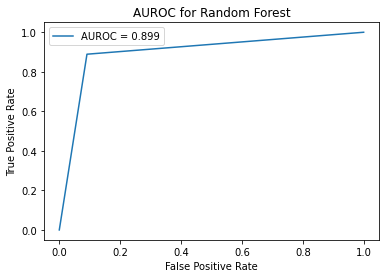

AUROC: 0.899
Sensitivity: 0.889
Specificity: 0.909


In [175]:
evalMetrics(y_pred, y_test, 'Random Forest')

svm

In [177]:

# Import libraries for SVM model
from sklearn.svm import SVC

# Create the SVM model
svm = SVC(random_state=42)

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model: {:.2f}%".format(acc*100))

Accuracy of SVM model: 90.00%


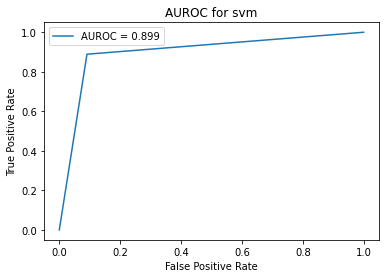

AUROC: 0.899
Sensitivity: 0.889
Specificity: 0.909


In [178]:
evalMetrics(y_pred, y_test, 'svm')

In [179]:
# Import libraries for logistic regression model
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression model: {:.2f}%".format(acc*100))


Accuracy of logistic regression model: 95.00%


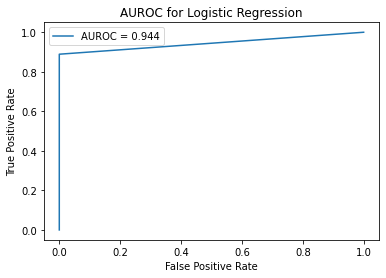

AUROC: 0.944
Sensitivity: 0.889
Specificity: 1.000


In [180]:
evalMetrics(y_pred, y_test, 'Logistic Regression')

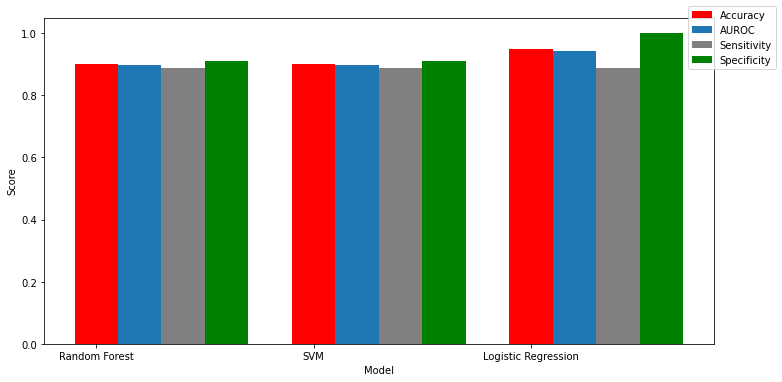

In [187]:

# metrics = ["AUROC", "Sensitivity", "Specificity"]
model_names = ["Random Forest", "SVM", "Logistic Regression"]
accuracy = [0.900, 0.900, 0.950]
AUROC = [0.899, 0.899, 0.944]
Sensitivity = [0.889, 0.889, 0.889]
Specificity = [0.909, 0.909, 1.000]

# Set the position of the x-ticks
x_pos = [i for i, _ in enumerate(model_names)]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bars
ax.bar(x_pos, accuracy, width=0.2, label='Accuracy', color='red')
ax.bar([p + 0.2 for p in x_pos], AUROC, width=0.2, label='AUROC')
ax.bar([p + 0.4 for p in x_pos], Sensitivity, width=0.2, label='Sensitivity',color='grey')
ax.bar([p + 0.6 for p in x_pos], Specificity, width=0.2, label='Specificity',color='green')

# Set the x-axis label
ax.set_xlabel('Model')

# Set the y-axis label
ax.set_ylabel('Score')

# Set the x-ticks
ax.set_xticks(x_pos)

# Set the x-tick labels
ax.set_xticklabels(model_names)

# Add a legend
ax.legend(bbox_to_anchor=(1.1, 1.05))

# Show the plot
plt.show()


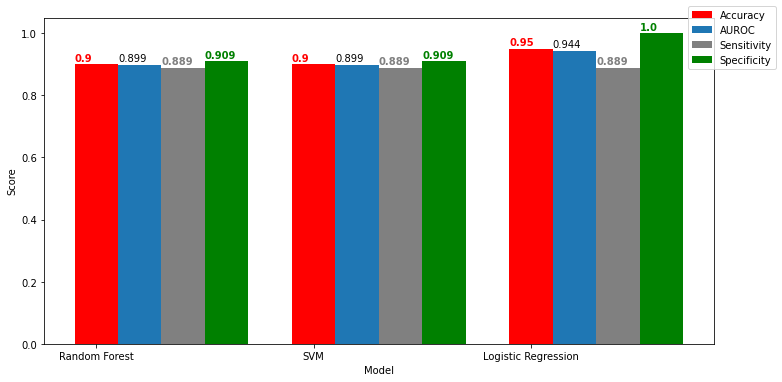

In [191]:
# Data for the plot

x = np.arange(3)
model_names = ["Random Forest", "SVM", "Logistic Regression"]
accuracy = [0.900, 0.900, 0.950]
AUROC = [0.899, 0.899, 0.944]
Sensitivity = [0.889, 0.889, 0.889]
Specificity = [0.909, 0.909, 1.000]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, accuracy, width=0.2, label='Accuracy', color='red')
ax.bar(x + 0.2, AUROC, width=0.2, label='AUROC')
ax.bar(x + 0.4, Sensitivity, width=0.2, label='Sensitivity',color='grey')
ax.bar(x + 0.6, Specificity, width=0.2, label='Specificity',color='green')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(bbox_to_anchor=(1.1, 1.05))

for i, v in enumerate(accuracy):
    ax.text(i - 0.1, v + 0.01, str(v), color='red', fontweight='bold')
for i, v in enumerate(AUROC):
    ax.text(i + 0.1, v + 0.01, str(v))
for i, v in enumerate(Sensitivity):
    ax.text(i + 0.3, v + 0.01, str(v), color='grey', fontweight='bold')
for i, v in enumerate(Specificity):
    ax.text(i + 0.5, v + 0.01, str(v), color='green', fontweight='bold')

plt.show()


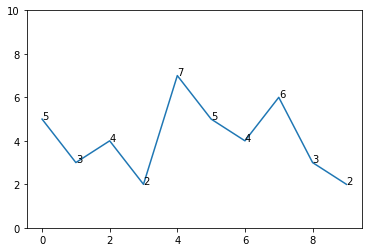

In [189]:
x = np.arange(10)
y = np.array([5,3,4,2,7,5,4,6,3,2])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0,10)
plt.plot(x,y)
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))

plt.show()

Evaluation metrics

# Import libraries for RF model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of RF model: {:.2f}%".format(acc*100))

# Import libraries for SVM model
from sklearn.svm import SVC

# Create the SVM model
svm = SVC(random_state=42)

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model: {:.2f}%".format(acc*100))

# Import libraries for logistic regression model
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression model: {:.2f}%".format(acc*100))
